In [3]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
%matplotlib inline

In [122]:
def get_pixels_count(filename, nside=8):
    n_pixels_count = hp.nside2npix(nside)
    pixels_counts = hp.ma(np.zeros(n_pixels_count, dtype=np.double))
    pixels_counts_normed = hp.ma(np.zeros(n_pixels_count, dtype=np.double))

    data = np.loadtxt(filename)
    dec = data[:,2]
    ra = data[:,3]
    events = hp.ang2pix(nside, np.radians(90 - dec), np.radians(ra), False)

    for i in range(n_pixels_count):
        ii = events==i
        n_inside = np.count_nonzero(ii)
        pixels_counts[i] = n_inside
    ii = pixels_counts >0
    mean_pixels = np.mean(pixels_counts[ii])
    std_pixels = np.std(pixels_counts[ii])
    pixels_counts_normed[ii] = (pixels_counts[ii] - mean_pixels)/std_pixels
    print('mean ', mean_pixels)
    print('std', std_pixels)
    return {'pixel_counts': pixels_counts_normed, 'mean_count': mean_pixels, 'std_count': std_pixels}

mean  48.620845921450154
std 26.6791338271


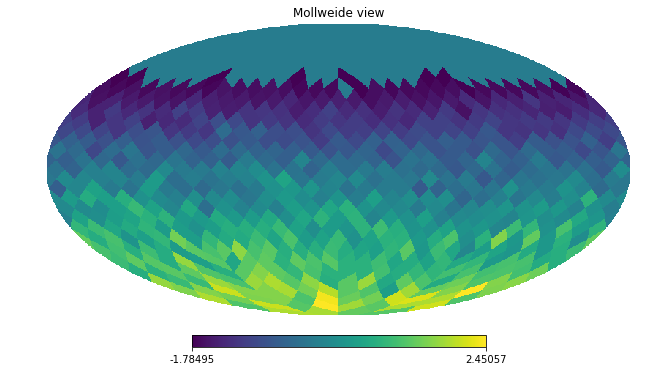

In [123]:
counts_high = get_pixels_count('../data/auger/events_a8.dat')
hp.mollview(counts_high['pixel_counts'])

mean  121.94179104477612
std 66.4358149437


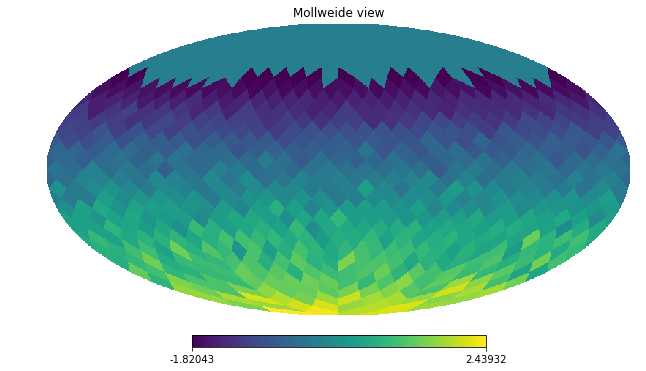

In [124]:
counts_low = get_pixels_count('../data/auger/events_4-8.dat')
hp.mollview(counts_low['pixel_counts'])

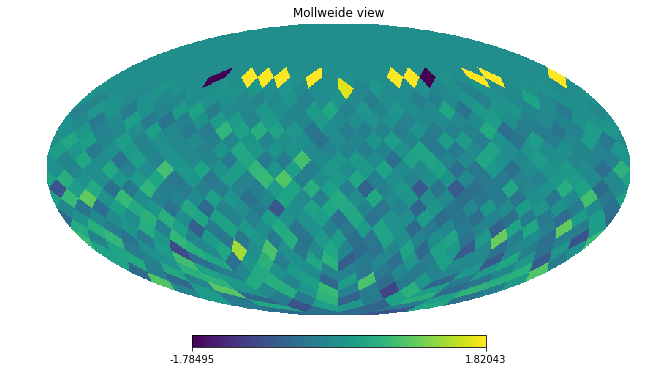

In [126]:
hp.mollview(counts_high['pixel_counts']-counts_low['pixel_counts'])